In [1]:
from pystan import StanModel
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
d = pd.read_csv('data-attendance-2.txt')
d = d.drop('PersonID', axis=1)
d = d.drop('Y', axis=1)
d.Score/=200
data = d.to_dict('list')
data['N'] = len(d)

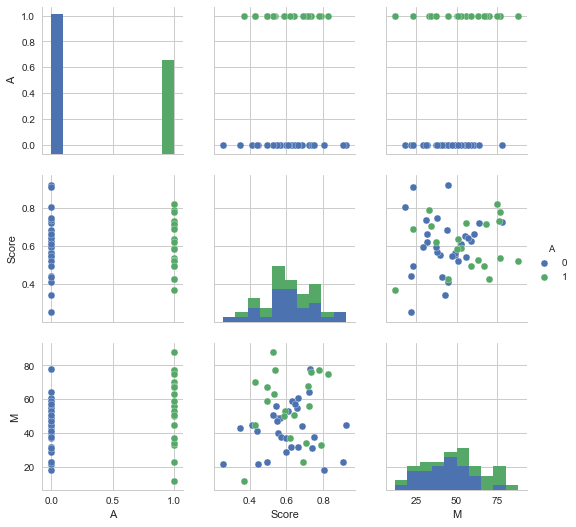

In [9]:
sns.pairplot(d, hue='A')

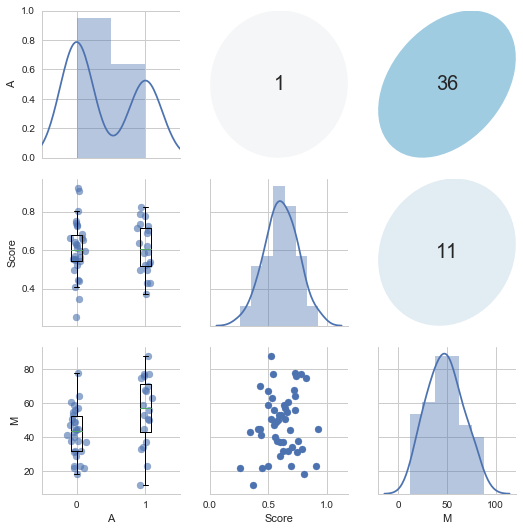

In [3]:
%run Dispatcher.py
g = sns.PairGrid(d, diag_sharey=False)
d_plot = Dispatcher()
g.map_diag(d_plot.diag)
g.map_lower(d_plot.comb);
g.map_upper(d_plot.ellipse);

In [4]:
stanmodel = StanModel(file='model5-6.stan')

In [5]:
fit = stanmodel.sampling(data=data, seed=123, thin = 1, warmup=500, n_jobs=-1)

In [6]:
fit

Inference for Stan model: anon_model_effff45eb01a48445c41908bc7bc0a6d.
4 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b1           3.58  2.0e-3   0.09   3.39   3.52   3.58   3.64   3.76   2144    1.0
b2           0.26  7.7e-4   0.04   0.18   0.24   0.26   0.29   0.35   2868    1.0
b3           0.29  3.1e-3   0.15 2.9e-3   0.19   0.29   0.39   0.59   2199    1.0
lambda[0]   39.59    0.04   1.89  35.95  38.32  39.57  40.84  43.38   2303    1.0
lambda[1]   57.51    0.03   1.94   53.8   56.2  57.52  58.81  61.27   3303    1.0
lambda[2]   42.93    0.02   1.18  40.66  42.12  42.92  43.73   45.3   4102    1.0
lambda[3]   52.79    0.04   2.15   48.6  51.33  52.75  54.26  57.02   2780    1.0
lambda[4]   58.62    0.04   2.29  54.29  57.06   58.6  60.12  63.12   2932    1.0
lambda[5]   43.43    0.02   1.24  41.06  42.58  43.42  44.27  45.94   4162

In [7]:
from scipy.stats import gaussian_kde
fit.model_pars.append("lp__")
def find_map(data):
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 501)
    eval_kde = kde.evaluate(x_range)
    return x_range[np.argmax(eval_kde)]

In [8]:
map = []
for i in fit.model_pars:
    print(i)
    if i in fit.constrained_param_names() or i == 'lp__':
        map.append(find_map(fit[i]))
    else:
        for j in range(0, fit[i].shape[1]):
            map.append(find_map(fit[i][:, j]))

b1
b2
b3
lambda
m_pred
lp__


In [9]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [10]:
fitdf = stanfit_to_dataframe(fit)
fitdf["map"] = map
fitdf

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,map
b1,3.577052,0.002027,0.093857,3.387945,3.515306,3.577095,3.641031,3.760374,2144.0,1.000227,3.585033
b2,0.263205,0.000774,0.041455,0.181071,0.235917,0.263609,0.290875,0.345033,2868.0,1.000893,0.264478
b3,0.291306,0.003127,0.146628,0.002926,0.192478,0.292294,0.388341,0.586487,2199.0,1.000189,0.263789
lambda[0],39.594732,0.039441,1.892751,35.946611,38.323561,39.565731,40.836387,43.381811,2303.0,1.000542,39.518633
lambda[1],57.513744,0.033775,1.941101,53.798938,56.201120,57.516787,58.813115,61.274669,3303.0,0.999821,57.506371
lambda[2],42.926904,0.018480,1.183580,40.659549,42.115440,42.916246,43.730734,45.300409,4102.0,1.001784,42.843885
lambda[3],52.791496,0.040819,2.152200,48.596211,51.328157,52.746163,54.259283,57.018369,2780.0,1.000086,52.674820
lambda[4],58.624504,0.042319,2.291481,54.293035,57.055560,58.602462,60.124446,63.122995,2932.0,0.999864,58.550945
lambda[5],43.431260,0.019246,1.241638,41.055634,42.581707,43.423899,44.266789,45.937763,4162.0,1.001750,43.419285
lambda[6],42.061811,0.020786,1.208648,39.679402,41.242012,42.046696,42.877678,44.436105,3381.0,1.001529,41.969653


In [14]:
mc = fit.extract()
df = pd.DataFrame({"b1":mc['b1'], "b2":mc["b2"], "b3":mc["b3"], 
             "lambda1":mc["lambda"][:, 0], "lambda50":mc["lambda"][:, 49], 
                   "lp__":mc["lp__"]})
df

,b1,b2,b3,lambda1,lambda50,lp__
0,3.589467,0.285076,0.281437,39.907443,55.359823,6897.628512
1,3.695073,0.215241,0.166701,42.631146,54.208164,6896.562353
2,3.667729,0.205569,0.197833,41.929145,53.049479,6896.795379
3,3.681781,0.207590,0.183529,42.313165,53.528661,6896.657095
4,3.681877,0.254535,0.160128,41.976981,55.460762,6897.179574
5,3.534747,0.253203,0.420823,39.643655,54.394181,6896.394224
6,3.668827,0.209051,0.158376,41.407692,52.262235,6896.482674
7,3.379780,0.285852,0.583196,35.908825,52.159949,6895.905220
8,3.639764,0.327028,0.114081,39.611587,55.883095,6895.877356
9,3.600797,0.232183,0.298566,40.601388,53.558256,6897.550708


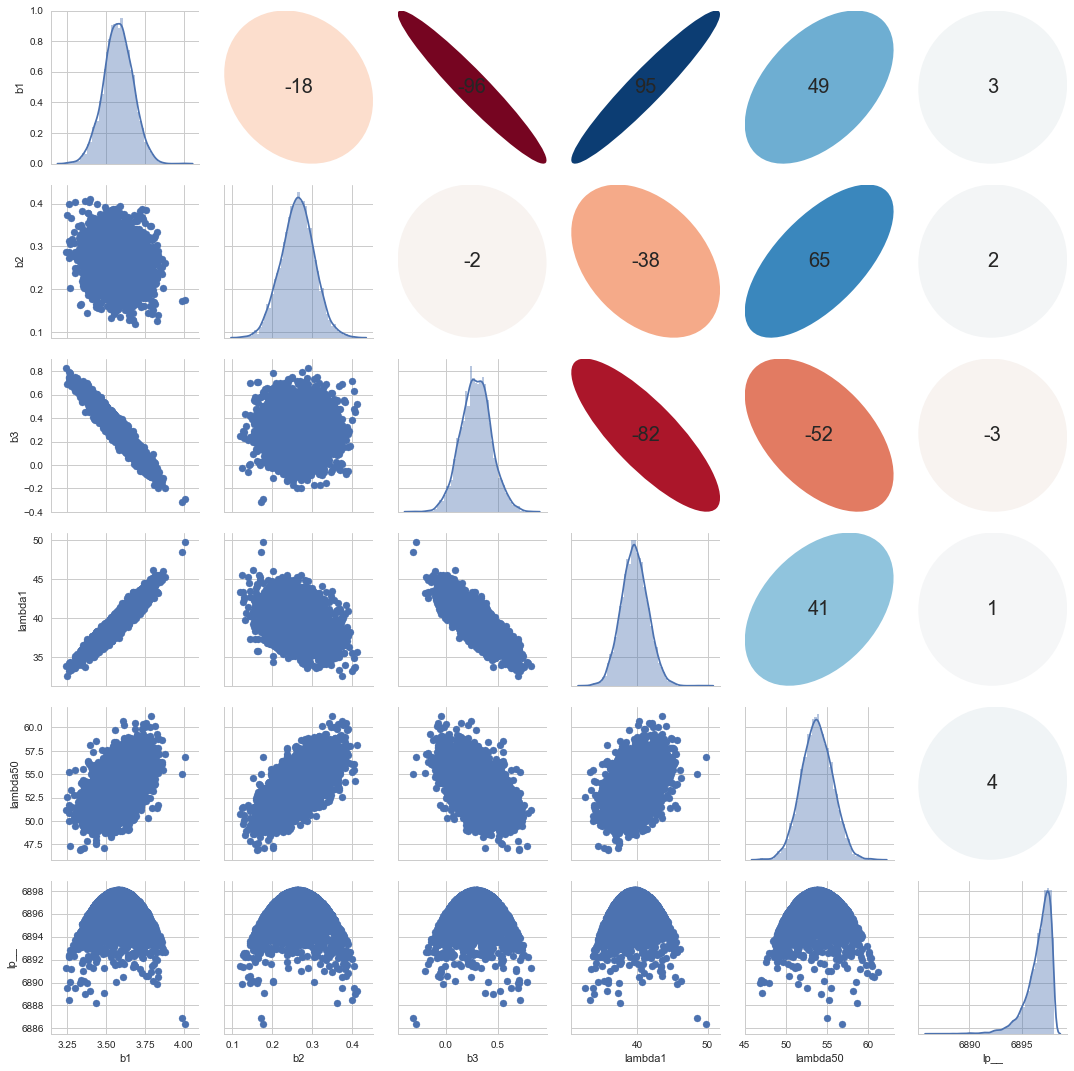

In [19]:
g = sns.PairGrid(df, diag_sharey=False)
d_plot = Dispatcher()
g.map_diag(d_plot.diag)
g.map_lower(d_plot.comb);
g.map_upper(d_plot.ellipse);

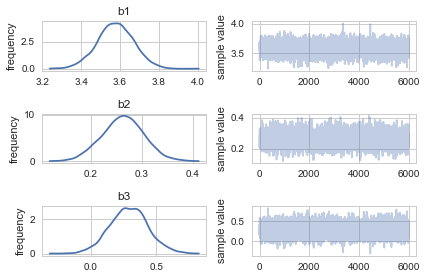

In [11]:
fit.traceplot(pars = ['b1', 'b2', 'b3']).tight_layout()

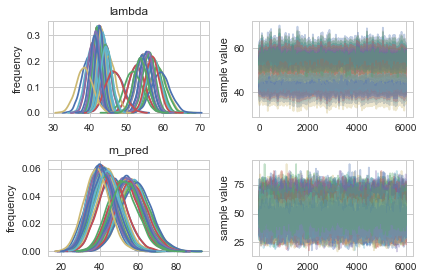

In [12]:
fit.traceplot(pars = ['lambda', 'm_pred']).tight_layout()

In [13]:
fitdf_lambda = fitdf.loc['lambda[0]': 'lambda[49]']
fitdf_mpred = fitdf.loc['m_pred[0]': 'm_pred[49]']